# EE 538: Analog Circuits for Sensor Systems
## Autumn 2020
## Instructor: Jason Silver

## Announcements

 - Phase 1 of Design Project due 12/6
    - Jupyter Notebook (.ipyb) submission on Canvas
    - For LTspice problems, include image (e.g. screen capture) of schematic(s)
 - Phase 2 submission due 12/19

## Week 9

 - Art of Electronics (AoE) Chapter ???

## Overview

 - Last time...
     - Noise filtering
     - Butterworth, Chebyshev, and Bessel filters
     - Sallen–Key filter architecture
 - Today...

## Python packages/modules

In [108]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile
import csv
#%matplotlib notebook

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

def plot_logx2y(x, y1, y2, xlabel, ylabel, y1label, y2label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogx(x, y1, 'b')
    ax.semilogx(x, y2, 'r', marker = 'o', markersize ='3', linestyle='None')
    ax.legend( [y1label,y2label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_logx3y(x, y1, y2, y3, xlabel, ylabel, y1label, y2label, y3label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogx(x, y1)
    ax.semilogx(x, y2)
    ax.semilogx(x, y3)
    ax.legend( [y1label,y2label,y3label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
 
def plot_x3y(x, y1, y2, y3, xlabel, ylabel, y1label, y2label, y3label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y1)
    ax.plot(x, y2)
    ax.plot(x, y3)
    ax.legend( [y1label,y2label,y3label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b')
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b')
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    fig.align_ylabels(ax[:])

def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_logxy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].semilogx(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].semilogx(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()

def plot_logxy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.semilogx(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_loglog(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.loglog(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xlogy(x, y, xlabel, ylabel, ymin, ymax):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    ax.set_ylim(ymin,ymax)
    
def read_ltspice_ac(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        next(data) # skip header line
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            complex = p[1].split(",")
            y.append(float(complex[0]))
            z.append(float(complex[1]))
    return x, y, z

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_noise_bandwidth(f, mag):
    fig, ax = plt.subplots(2, figsize=(10.0,7.5))
    ax[0].semilogx(f, RC_mag)
    ax[0].set_xscale("log")
    ax[0].set_xlim(f[0], f[-1])
    ax[0].set_xticks(np.logspace(0.1,4,5))
    ax[0].set_xticklabels([])
    ax[0].set_ylabel('Magnitude [V/V]')
    ax[0].set_title('Equivalent Noise Bandwidth')
    ax[0].grid()

    ax[1].hlines(1, 0, f_enb, color='tab:blue')
    ax[1].hlines(0, f_enb, f[-1], color='tab:blue')
    ax[1].vlines(f_enb, 0, 1, color='tab:blue')
    ax[1].set_xlim(f[0], f[-1])
    ax[1].set_xscale("log")
    ax[1].set_xticks(np.logspace(0.1,4,5))
    ax[1].set_xticklabels([r'$10^0$',r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'])
    ax[1].set_ylabel('Magnitude [V/V]')
    ax[1].set_xlabel('Frequency [Hz]')
    ax[1].grid()
    
def noise_hist(vnoise, vn_rms, bins):
    fig = plt.figure( figsize=(10.0,7.5) )
    vn_norm = vnoise/ vn_rms
    ax = fig.add_subplot(111)
    n, bins, rectangles = ax.hist(vn_norm, bins, density=True, range=(-3, 3),
                                 color='b')
    ax.set_xlabel(r'Sample Voltage [$v_{n(rms)}$]')
    ax.set_ylabel('Probability Density')
    ax.grid()
    fig.canvas.draw()

def plot_freqtrans(f, mag, x1label, y1label, tin, tran, x2label, y2label):
    fig, axs = plt.subplots(2, figsize = (10.0, 9));
    
    axs[0].semilogx(f, 20*np.log10(mag))       
    axs[0].grid()
    axs[0].set_xlabel(x1label)
    axs[0].set_ylabel(y1label)
        
    axs[1].plot(tin, tran)  
    axs[1].grid()
    axs[1].set_xlabel(x2label)
    axs[1].set_ylabel(y2label)
    
    fig.align_ylabels(axs[:])    
    
def plot_multifreqtrans(f, mags, x1label, y1label, tin, trans, x2label, y2label, labels):
    fig, axs = plt.subplots(2, figsize = (10.0, 9));
    
    for mag in mags:
        axs[0].semilogx(f, 20*np.log10(mag))
        
    axs[0].legend( labels ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.2))    
    axs[0].grid()
    axs[0].set_xlabel(x1label)
    axs[0].set_ylabel(y1label)
        
    for tran in trans:
        axs[1].plot(tin, tran)  
    axs[1].grid()
    axs[1].set_xlabel(x2label)
    axs[1].set_ylabel(y2label)
    
    fig.align_ylabels(axs[:])
    
def SK_lowpass(Q, cn, fc, n, C, K):
   
    d = (n*(1-K)+1)
    a = d**2*Q**2
    b = 2*Q**2*d-n
    c = a
    
    m_a = (-b+np.sqrt(b**2-4*a*c))/2/a
    m_b = (-b-np.sqrt(b**2-4*a*c))/2/a
    
    C1 = C
    C2 = n*C1
    R2 =1/fc/2/np.pi/C1/np.sqrt(m_b*n)/cn
    R1 = R2*m_b

    return C1, C2, R1, R2

In [168]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

# Lecture 9 - Sampling and Quantization

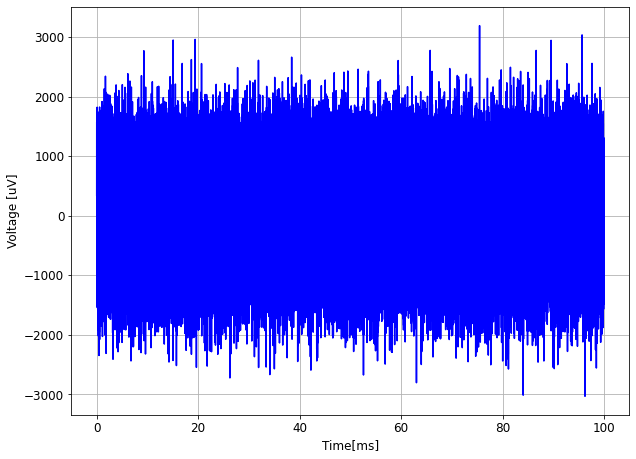

In [1111]:
vn_rms = .7e-3
fs = 1e6
N = 100e-3*fs
t = np.arange(N) / fs
vn_t = np.random.normal(0, vn_rms, size=t.shape)

plot_xy(1e3*t, 1e6*vn_t, 'Time[ms]', 'Voltage [uV]')

0.0007003651916125861

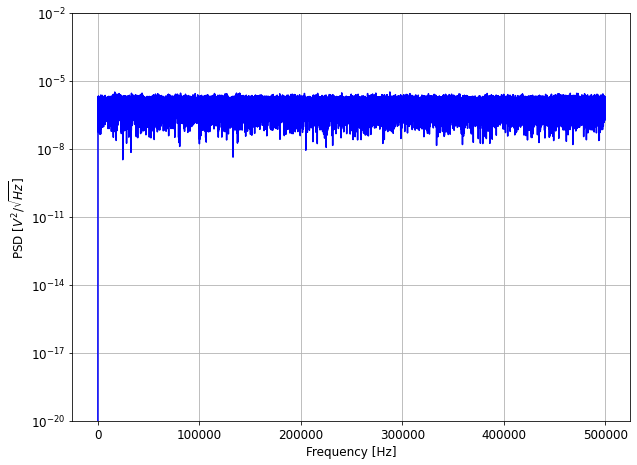

In [1121]:
f, en_2 = signal.periodogram(vn_t, 1e6)
plot_xlogy(f, np.sqrt(en_2), 'Frequency [Hz]', r'PSD [$V^2/\sqrt{Hz}$]', 1e-20, 1e-2)
np.std(vn_t)

In [1123]:
np.mean(np.sqrt(en_2))/100

8.780138542644543e-09

In [1088]:
# write time-domain noise to file for SPICE simulation
with open('noise_test.csv', 'w') as f:
        writer = csv.writer(f, delimiter='\t')
        writer.writerows(zip(t,vn_t))

In [1089]:
samplerate, data = wavfile.read('sampled_signal.wav')
time = np.arange(0,200e-3,1/samplerate)
if np.size(time) > np.size(data):
    time = time[0:np.size(data)]
sine_ideal = np.asarray(np.sin(2*np.pi*time*1e3))

# quantize the analog waveform based on LSB size
N_bits = 16
lsb = 2/2**N_bits
sine_meas = np.round(data[0:np.size(time)]/2**31 / lsb) * lsb
vn_q = sine_meas - sine_ideal

9.860232760825705e-06

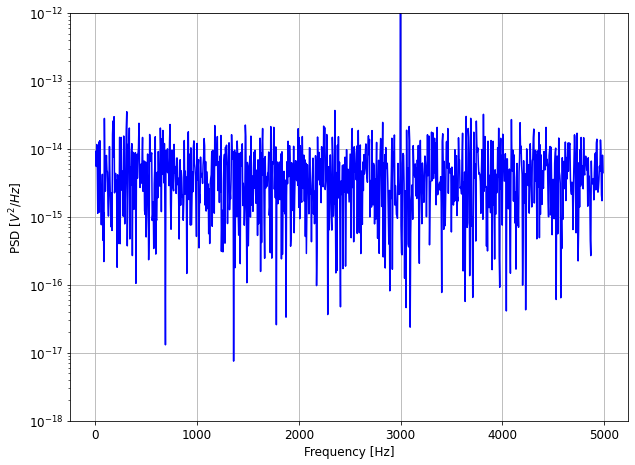

In [1090]:
f, en_q_psd = signal.periodogram(vn_q, 10e3)
plot_xlogy(f[1:-2], en_q_psd[1:-2], 'Frequency [Hz]', r'PSD [$V^2/Hz$]', 1e-18, 1e-12)
#np.sqrt(np.sum(en_q_psd)*5)
np.std(vn_q)

In [1106]:
samplerate, data = wavfile.read('filtered_noise.wav')
time = np.arange(0,200e-3,1/samplerate)
if np.size(time) > np.size(data):
    time = time[0:np.size(data)]

# quantize the analog waveform based on LSB size
N_bits = 24
lsb = 2/2**N_bits
noise_meas = np.round(data[0:np.size(time)]/2**31 / lsb) * lsb

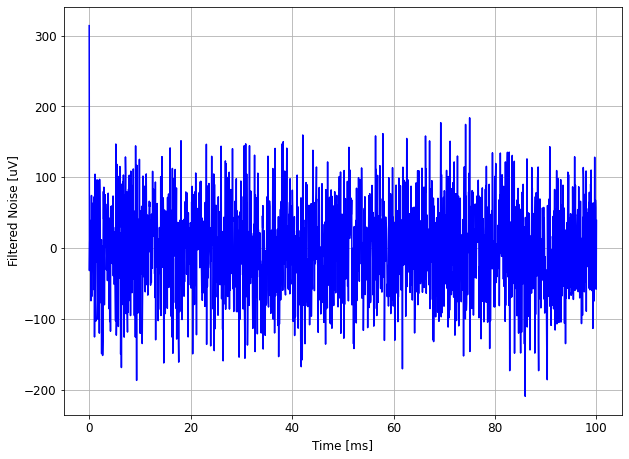

In [1108]:
plot_xy(1e3*time, 1e6*noise_meas, 'Time [ms]', 'Filtered Noise [uV]')

In [1109]:
np.std(noise_meas)

6.345579755030378e-05

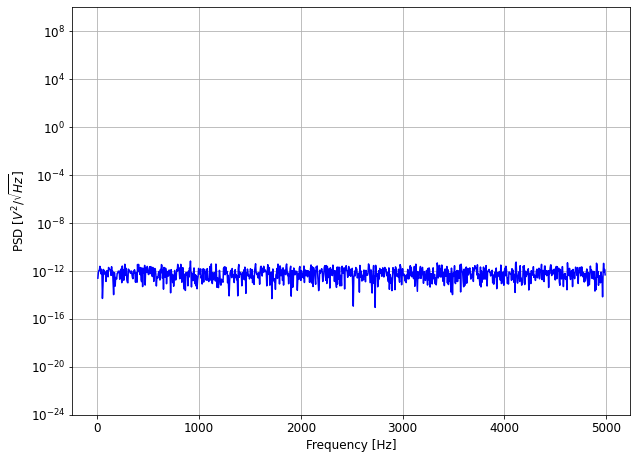

In [1034]:
f, en_psd = signal.periodogram(noise_meas, 10e3)
plot_xlogy(f[1:-2], en_psd[1:-2], 'Frequency [Hz]', r'PSD [$V^2/\sqrt{Hz}$]', 1e-24, 1e10)

In [1035]:
np.sqrt(np.sum(en_psd)*5)

6.550252475677345e-05